# Case study - Leads Scoring

**Problem statement**:

X Education aims to enhance lead conversion by identifying potential customers. With a dataset of 9000 leads and target variable 'Converted,' build a logistic regression model to assign lead scores (0-100). Prioritize hot leads for better conversion rates. Address future adjustments outlined by the company in the logistic regression model.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [2]:
leadDf = pd.read_csv('/content/Leads.csv');

In [3]:
leadDf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leadDf.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
leadDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# missing value
round(100*(leadDf.isnull().sum()/leadDf.shape[0]),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

# Data Preparation

In [7]:
leadCols=['Do Not Email', 'Do Not Call', 'Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
          'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
          'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

for leadCol in leadCols:
  leadDf[leadCol] = leadDf[leadCol].apply(lambda x : 1 if x=='Yes' else 0 )

leadDf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


In [8]:
# replace select into NAN as Select is good as "NAN"
leadDf.replace( "Select", np.nan, inplace = True)

In [9]:
leadDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
leadDf['Lead Quality'].replace(np.nan, "Not Sure",inplace=True)

In [11]:
# drop cols having more missing values
leadDf.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index',
             'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace = True)

In [12]:
# Impute 'MUMBAI' for missing values in the 'City' column
leadDf['City'].fillna('Mumbai', inplace=True)

# Impute 'Other_Specialization' for missing values in the 'Specialization' column
leadDf['Specialization'].fillna('Other_Specialization', inplace=True)

# Impute 'Will revert after reading the email' for missing values in the 'Tags' column
leadDf['Tags'].fillna('Will revert after reading the email', inplace=True)

# Impute 'Better Career Prospects' for missing values in the 'What matters most to you in choosing a course' column
leadDf['What matters most to you in choosing a course'].fillna('Better Career Prospects', inplace=True)

# Impute 'Unemployed' for missing values in the 'What is your current occupation' column
leadDf['What is your current occupation'].fillna('Unemployed', inplace=True)

# Impute 'India' for missing values in the 'Country' column
leadDf['Country'].fillna('India', inplace=True)

In [13]:
round(100 * (leadDf.isnull().sum() / len(leadDf)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education               78.46
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [14]:
# Calculate the percentage of missing values for each column
missing_percentage = leadDf.isnull().sum() / leadDf.shape[0]

# Identify columns where the percentage of missing values is greater than 70%
columns_to_drop = missing_percentage[missing_percentage > 0.70].index

# Drop the identified columns
leadDf = leadDf.drop(columns=columns_to_drop)


In [15]:
# Drop rows with any remaining NULL values (less than 2%)
leadDf.dropna(inplace=True)

# Display the first few rows after dropping NULL values
leadDf.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,Interested in other courses,Low in Relevance,0,0,Mumbai,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,Ringing,Not Sure,0,0,Mumbai,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,Will revert after reading the email,Might be,0,0,Mumbai,0,0,Modified


# Exploratory Data Analysis

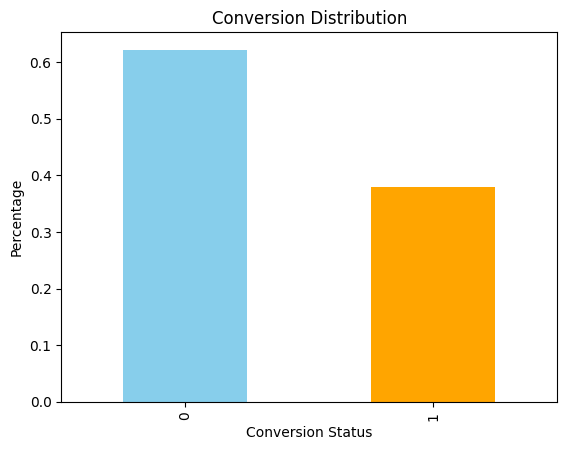

In [16]:
# Calculate the normalized value counts for the "Converted" variable
conversion_distribution = leadDf["Converted"].value_counts(normalize=True)

# Plotting the bar graph
conversion_distribution.plot(kind='bar', color=['skyblue', 'orange'])

# Adding labels and title
plt.title("Conversion Distribution")
plt.xlabel("Conversion Status")
plt.ylabel("Percentage")

# Display the plot
plt.show()

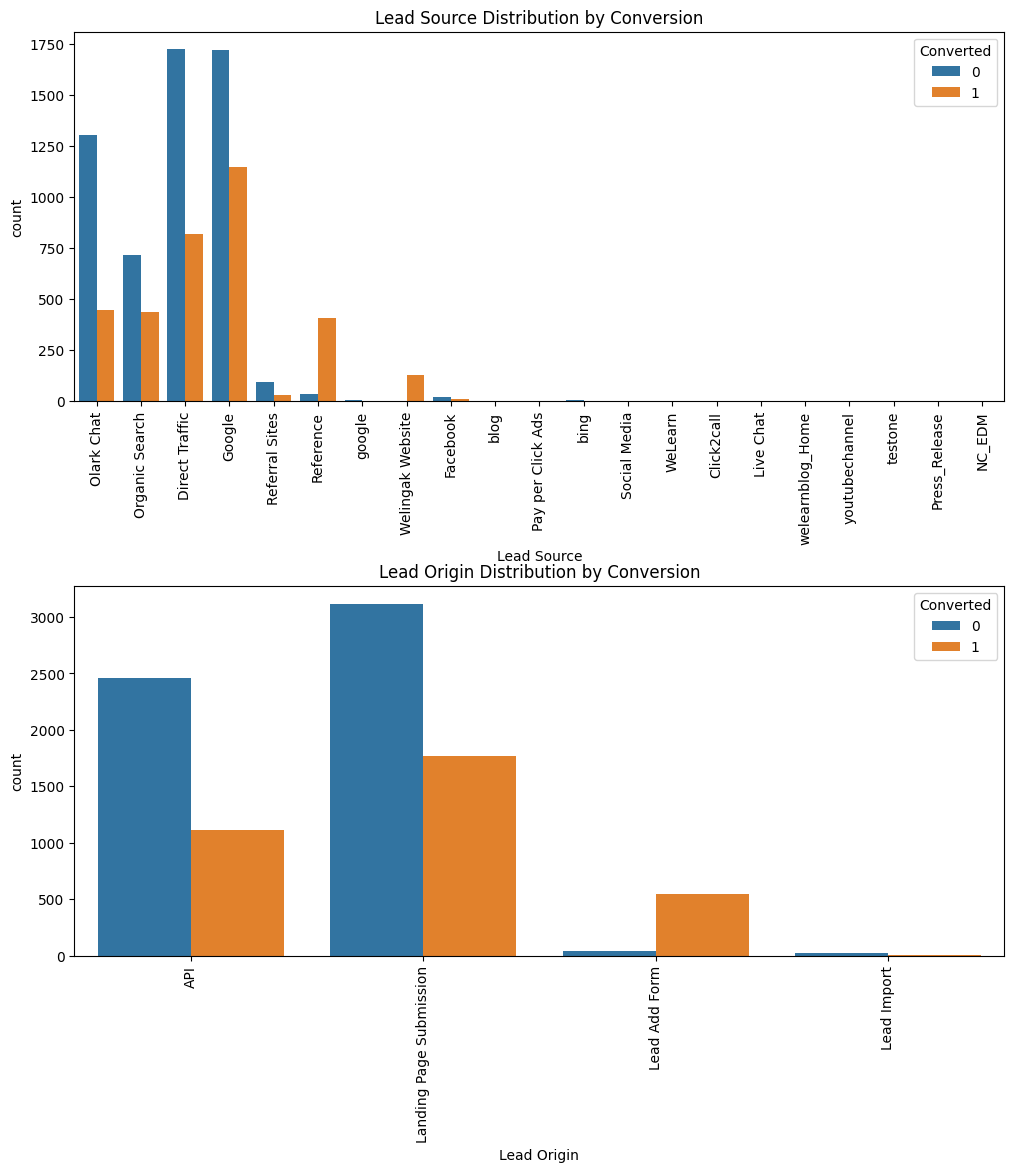

In [17]:
# Set the figure size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.5)

# List of features to plot
features_to_plot = ['Lead Source', 'Lead Origin']

# Iterate through features and create count plots
for i, feature in enumerate(features_to_plot):
    sns.countplot(x=feature, hue='Converted', data= leadDf, ax=axes[i])
    axes[i].set_title(f'{feature} Distribution by Conversion')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Display the plots
plt.show()

1. API and Landing Page Submission exhibit a conversion rate of approximately 30%, with a notable number of leads generated.
2. The Lead Add Form, despite having a low lead count, demonstrates a remarkably high conversion rate.
3. Lead Import, with both low lead count and conversion rate, appears to have minimal impact in the analysis.

In [18]:
# Replace 'google' with 'Google' for consistency
leadDf['Lead Source'].replace("google", 'Google',inplace = True)

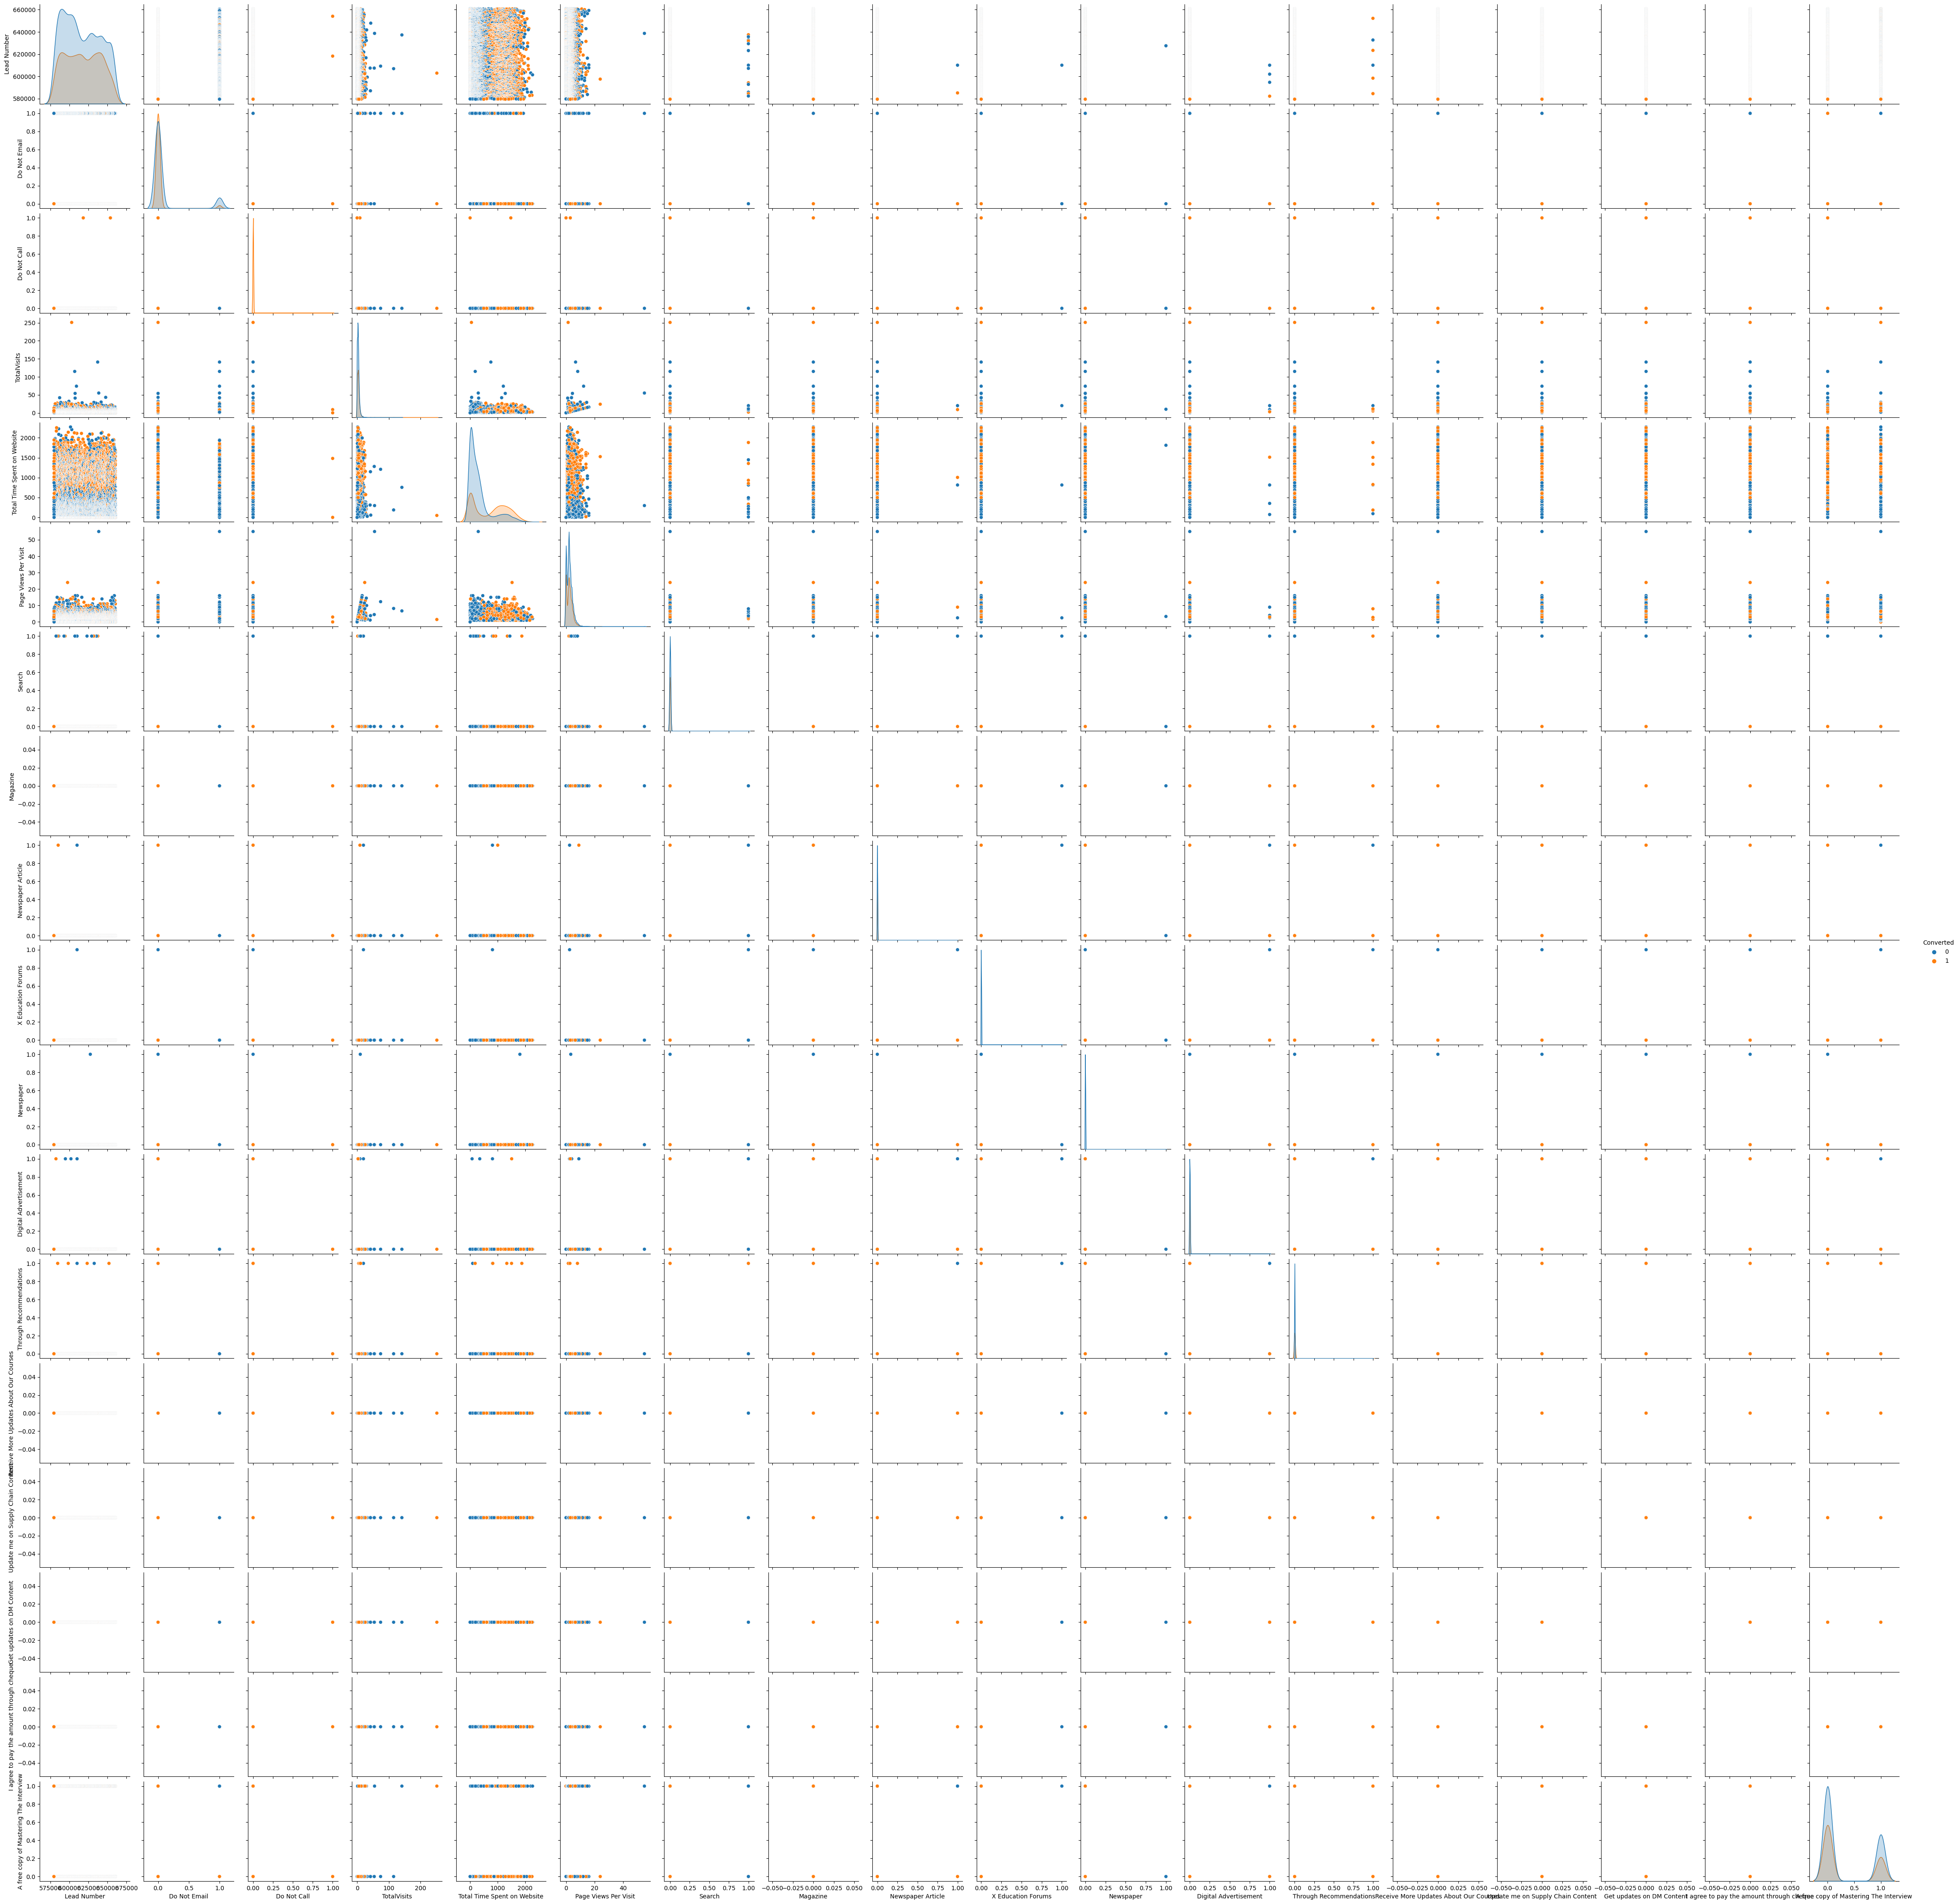

In [20]:
# pair plot
pairPlot_Data = sns.pairplot(leadDf, diag_kind='kde', hue='Converted')
plt.show()

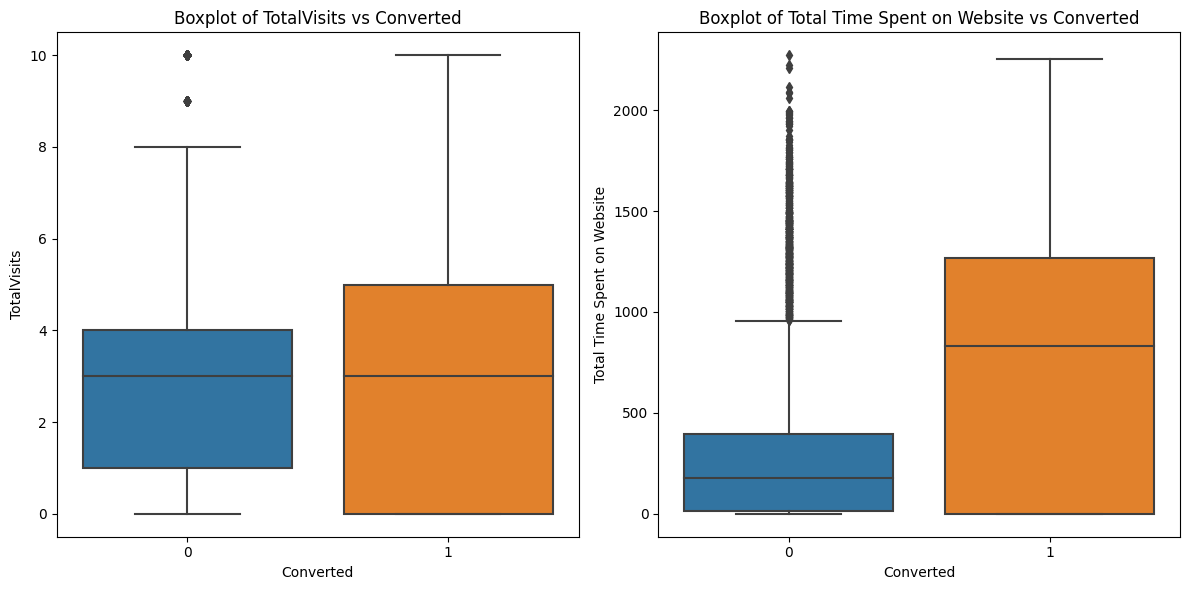

In [23]:
q1_total_visits = leadDf["TotalVisits"].quantile(0.95)
leadDf.loc[leadDf["TotalVisits"] >= q1_total_visits, "TotalVisits"] = q1_total_visits

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    sns.boxplot(x="Converted", y=feature, data=leadDf, ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature} vs Converted')
    axes[i].set_xlabel('Converted')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

1. The median values for both conversion and non-conversion cases are identical, providing inconclusive insights based on this information.
2. Users who spend more time on the website tend to have a higher likelihood of conversion.

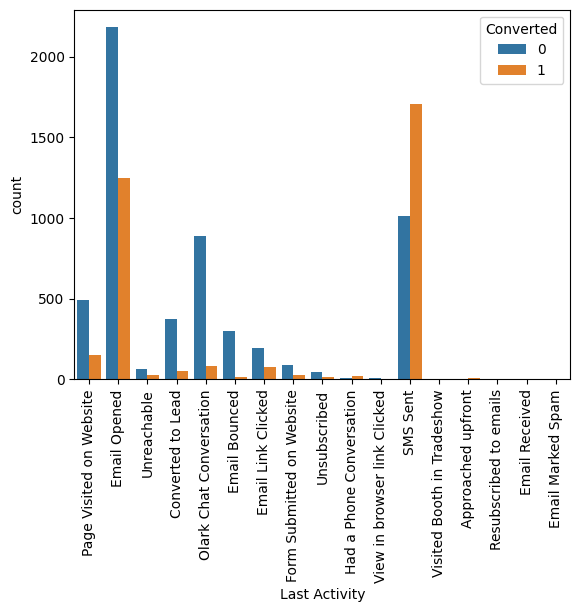

In [24]:
# Countplot of 'Last Activity' vs 'Converted'
sns.countplot(x="Last Activity", hue="Converted", data=leadDf)
plt.xticks(rotation='vertical')
plt.show()

1. The highest count of last activities is recorded for "Email Opened."
2. The maximum conversion rate is observed for leads with the last activity being "SMS Sent."

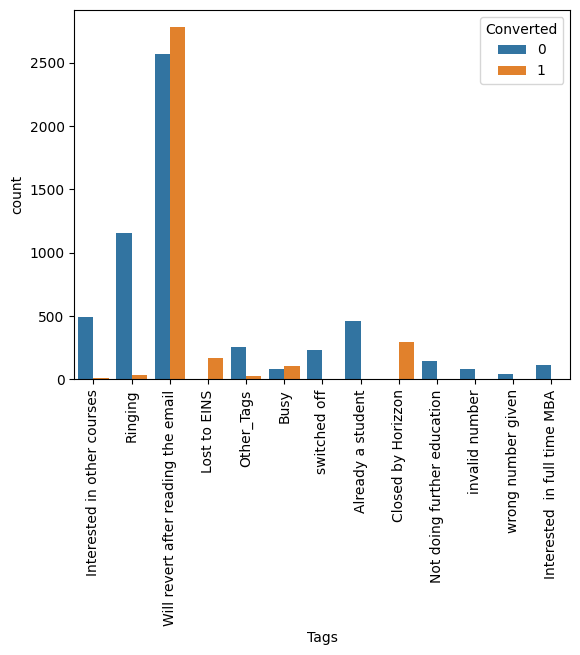

In [25]:
# Converting low count categories in 'Tags' to 'Other_Tags'
low_count_tags = ['In confusion whether part time or DLP', 'in touch with EINS', 'Diploma holder (Not Eligible)',
                  'Approached upfront', 'Graduation in progress', 'number not provided', 'opp hangup', 'Still Thinking',
                  'Lost to Others', 'Shall take in the next coming month', 'Lateral student', 'Interested in Next batch',
                  'Recognition issue (DEC approval)', 'Want to take admission but has financial problems',
                  'University not recognized']
leadDf['Tags'] = leadDf['Tags'].replace(low_count_tags, 'Other_Tags')

# Plotting 'Tags' again
sns.countplot(x="Tags", hue="Converted", data=leadDf)
plt.xticks(rotation='vertical')
plt.show()

1.The lead tags 'Will revert after reading the email' and 'Closed by Horizzon' exhibit a high conversion rate.


**SUMMARY:**

To enhance the overall lead conversion rate, focus on improving the conversion rates of leads originating from 'API' and 'Landing Page Submission,' as well as increasing the number of leads from 'Lead Add Form.'

Additionally, target efforts to enhance the conversion rates of leads from sources like 'Google,' 'Olark Chat,' 'Organic Search,' and 'Direct Traffic.' Increase the lead count from sources like 'Reference' and 'Welingak Website' to positively impact overall conversion.

Optimize website design to make it more engaging, increasing the time users spend on the site.

For leads with the last activity as 'Email Opened,' consider making direct calls to improve conversion. Additionally, focus on increasing the count of leads with the last activity as 'SMS Sent.'


In [26]:
# Dropping unnecessary columns

leadDf = leadDf.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call'],1)

leadDf.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


#Dummies Creation

In [27]:
dummies = pd.get_dummies(leadDf[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
leadDf = leadDf.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity'], axis=1)
leadDf.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0


In [29]:
leadDf = pd.concat([leadDf, dummies], axis=1)
leadDf.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#Test Train Split

In [30]:
# Assigning feature variable to X
X = leadDf.drop(['Prospect ID', 'Converted'], axis=1)
# Assigning response variable to y
y = leadDf['Converted']

# Displaying y
print(y)

# Displaying the first few rows of X
X.head()


0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9074, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#Scaler

In [32]:
# Scaling numerical features using StandardScaler
scaler = StandardScaler()

# Fit and transform the specified columns in the training set
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

# Display the first few rows of the transformed training set
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,-0.432779,-0.160255,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,-0.432779,-0.540048,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-1.150329,-0.888650,-1.132538,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4750,0,-0.432779,1.643304,-0.179666,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0.643547,2.017593,0.058552,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
# Calculate and print the conversion rate
conversion_rate = (sum(leadDf['Converted']) / len(leadDf['Converted'].index)) * 100
print("Conversion rate is", conversion_rate)

Conversion rate is 37.85541106458012


#Selecting Features with Recursive Feature Elimination (RFE)

In [36]:
# Start with 15 features selected by Recursive Feature Elimination (RFE)
# Further optimization will be done by inspecting Variance Inflation Factor (VIF) and p-value of the features

logistic_reg = LogisticRegression()
rfe_selector = RFE(logistic_reg, n_features_to_select = 15)
rfe_result = rfe_selector.fit(X_train, y_train)

# Display the features along with RFE support and ranking
feature_ranking_info = list(zip(X_train.columns, rfe_result.support_, rfe_result.ranking_))
feature_ranking_info

[('Do Not Email', True, 1),
 ('TotalVisits', False, 55),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 54),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 52),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 53),
 ('Lead Source_Other_Lead_Source', False, 50),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites', False, 35),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', False, 34),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 70),
 ('Last Activity_Email Marked Spam', False, 47),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Email Received', False, 68),
 ('Last Activity_Form Submitted on Website', False, 41),
 ('Last Activity_Had a Phone Conversation', False, 10),


In [37]:
col_support = X_train.columns[rfe_result.support_]

# Model Building

In [39]:
# Add a constant to the selected features in X_train
X_train_sm = sm.add_constant(X_train[col_support])

# Fit the logistic regression model
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()

# Display the summary statistics
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Tue, 26 Dec 2023   Deviance:                       3160.2
Time:                        08:48:06   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5663
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7920      0.278     -2.845      0.004      -1.338      -0.246
Do Not Email                                  -1.3202      0.212     -6.236      0.000      -1.735      -0.905
Lead Origin_Lead Add Form                      1.0521      0.363      2.897      0.004       0.340       1.764
Lead Source_Welingak Website                   3.4638      0.819      4.231      0.000       1.859       5.068
What is your current occupation_Unemployed    -1.1148      0.237     -4.713      0.000      -1.578      -0.651
Tags_Busy                                      3.5772      0.333     10.752      0.000       2.925       4.229
Tags_Closed by Horizzon                        7.7760      0.762     10.203      0.000       6.282       9.270
Tags_Lost to EINS                              8.9986      0.754     11.931      0.000       7.520      10.477
Tags_Ringing                                  -1.9203      0.340     -5.640      0.000      -2.588      -1.253
Tags_Will revert after reading the email       3.7576      0.229     16.412      0.000       3.309       4.206
Tags_invalid number                          -23.4125   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                             -2.5224      0.589     -4.279      0.000      -3.678      -1.367
Tags_wrong number given                      -23.0270   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                         -3.3269      0.129    -25.702      0.000      -3.581      -3.073
Lead Quality_Worst                            -3.9922      0.832     -4.798      0.000      -5.623      -2.361
Last Notable Activity_SMS Sent                 2.7952      0.122     22.846      0.000       2.555       3.035
==============================================================================================================
"""

In [40]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by = 'Variance Inflation Factor', ascending = False)
    print(vif_df)

calculate_vif(X_train[col_support])

                                      Features  Variance Inflation Factor
3   What is your current occupation_Unemployed                       7.37
12                       Lead Quality_Not Sure                       4.05
8     Tags_Will revert after reading the email                       4.02
7                                 Tags_Ringing                       1.86
1                    Lead Origin_Lead Add Form                       1.58
14              Last Notable Activity_SMS Sent                       1.54
13                          Lead Quality_Worst                       1.35
2                 Lead Source_Welingak Website                       1.34
5                      Tags_Closed by Horizzon                       1.25
10                           Tags_switched off                       1.17
4                                    Tags_Busy                       1.15
0                                 Do Not Email                       1.11
6                            Tags_Lost

In [41]:
# Drop the column 'Tags_invalid number' from the selected features having high p value
col_support = col_support.drop('Tags_invalid number')
col_support


Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [42]:
# Add constant to the features
X_train_sm = sm.add_constant(X_train[col_support])

# Fit the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()

# Display the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Tue, 26 Dec 2023   Deviance:                       3171.8
Time:                        09:00:12   Pearson chi2:                 3.07e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5655
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

In [43]:
# Drop the column 'Tags_wrong number given' from the selected features having high p value
col_support = col_support.drop('Tags_wrong number given')
col_support

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [44]:
# Add constant to the features
X_train_sm = sm.add_constant(X_train[col_support])

# Fit the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()

# Display the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Tue, 26 Dec 2023   Deviance:                       3175.8
Time:                        09:01:21   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5653
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

In [45]:
calculate_vif(X_train[col_support])

                                      Features  Variance Inflation Factor
3   What is your current occupation_Unemployed                       7.18
10                       Lead Quality_Not Sure                       4.04
8     Tags_Will revert after reading the email                       3.81
7                                 Tags_Ringing                       1.80
1                    Lead Origin_Lead Add Form                       1.58
12              Last Notable Activity_SMS Sent                       1.52
11                          Lead Quality_Worst                       1.35
2                 Lead Source_Welingak Website                       1.34
5                      Tags_Closed by Horizzon                       1.25
9                            Tags_switched off                       1.16
4                                    Tags_Busy                       1.14
0                                 Do Not Email                       1.11
6                            Tags_Lost

In [46]:
# Drop the column 'What is your current occupation_Unemployed' from the selected features having high VIF
col_support = col_support.drop('What is your current occupation_Unemployed')
col_support

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [47]:
# Add constant to the features
X_train_sm = sm.add_constant(X_train[col_support])

# Fit the logistic regression model
logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm.fit()

# Display the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1601.0
Date:                Tue, 26 Dec 2023   Deviance:                       3202.0
Time:                        09:05:49   Pearson chi2:                 3.48e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5635
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.9192      0.211     -9.080      0.000      -2.333      -1.505
Do Not Email                                -1.2835      0.212     -6.062      0.000      -1.698      -0.868
Lead Origin_Lead Add Form                    1.2035      0.368      3.267      0.001       0.482       1.925
Lead Source_Welingak Website                 3.2825      0.820      4.002      0.000       1.675       4.890
Tags_Busy                                    3.8043      0.330     11.525      0.000       3.157       4.451
Tags_Closed by Horizzon                      7.9789      0.762     10.467      0.000       6.485       9.473
Tags_Lost to EINS                            9.1948      0.753     12.209      0.000       7.719      10.671
Tags_Ringing                                -1.8121      0.336     -5.401      0.000      -2.470      -1.154
Tags_Will revert after reading the email     3.9906      0.228     17.508      0.000       3.544       4.437
Tags_switched off                           -2.4456      0.586     -4.171      0.000      -3.595      -1.297
Lead Quality_Not Sure                       -3.5218      0.126    -28.036      0.000      -3.768      -3.276
Lead Quality_Worst                          -3.9106      0.856     -4.567      0.000      -5.589      -2.232
Last Notable Activity_SMS Sent               2.7395      0.120     22.907      0.000       2.505       2.974
============================================================================================================
"""

In [48]:
calculate_vif(X_train[col_support])

                                    Features  Variance Inflation Factor
9                      Lead Quality_Not Sure                       2.62
7   Tags_Will revert after reading the email                       2.57
1                  Lead Origin_Lead Add Form                       1.58
6                               Tags_Ringing                       1.52
11            Last Notable Activity_SMS Sent                       1.51
2               Lead Source_Welingak Website                       1.34
4                    Tags_Closed by Horizzon                       1.13
0                               Do Not Email                       1.10
3                                  Tags_Busy                       1.10
8                          Tags_switched off                       1.10
5                          Tags_Lost to EINS                       1.04
10                        Lead Quality_Worst                       1.03


* All variables exhibit satisfactory values for both VIF and p-values, indicating that there is no need for further variable elimination. Consequently, we can proceed to generate predictions using this model exclusively.

In [49]:
# Function: evaluate_classification
# Parameters: y_actual, y_predicted
# Prints Confusion matrix, accuracy, Sensitivity, Specificity, False Positive Rate, Positive Predictive Value
# Returns accuracy, Sensitivity, Specificity

def evaluate_classification(y_actual, y_predicted, display_scores=False):
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predicted)

    true_positive = confusion_matrix[1, 1]
    true_negative = confusion_matrix[0, 0]
    false_positive = confusion_matrix[0, 1]
    false_negative = confusion_matrix[1, 0]

    accuracy = metrics.accuracy_score(y_actual, y_predicted)
    sensitivity = true_positive / (true_positive + false_negative)
    specificity = true_negative / (true_negative + false_positive)
    precision = metrics.precision_score(y_actual, y_predicted)

    if display_scores:
        print("Confusion Matrix:\n", confusion_matrix)
        print("Accuracy:", accuracy)
        print("Sensitivity:", sensitivity)
        print("Specificity:", specificity)
        print("Precision:", precision)

    return accuracy, sensitivity, specificity, precision


In [50]:
# Obtain predicted values for the training set
predicted_values_train = res.predict(X_train_sm)
predicted_values_train[:10]

3009    0.189946
1012    0.061006
9226    0.000707
4750    0.784007
7987    0.977108
1281    0.991926
2880    0.189946
4971    0.750786
7536    0.888099
1248    0.000707
dtype: float64

In [51]:
# Reshape the predicted values for the training set
predicted_values_train = predicted_values_train.values.reshape(-1)
predicted_values_train[:10]

array([1.89945603e-01, 6.10055097e-02, 7.07499981e-04, 7.84007054e-01,
       9.77108077e-01, 9.91926005e-01, 1.89945603e-01, 7.50785828e-01,
       8.88098557e-01, 7.07499981e-04])

In [52]:
# Create a DataFrame with actual values and predicted probabilities for training set
train_predictions_df = pd.DataFrame({'Convert': y_train.values, 'Convert_Prob': predicted_values_train})
train_predictions_df['Pros_ID'] = y_train.index
train_predictions_df.head()


,Convert,Convert_Prob,Pros_ID
0,0,0.189946,3009
1,0,0.061006,1012
2,0,0.000707,9226
3,1,0.784007,4750
4,1,0.977108,7987


In [54]:
# Create a new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
train_predictions_df['predicted'] = train_predictions_df['Convert_Prob'].map(lambda x: 1 if x > 0.5 else 0)

# Display the head of the DataFrame
train_predictions_df.head()


,Convert,Convert_Prob,Pros_ID,predicted
0,0,0.189946,3009,0
1,0,0.061006,1012,0
2,0,0.000707,9226,0
3,1,0.784007,4750,1
4,1,0.977108,7987,1


In [55]:
# Let's check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(train_predictions_df.Convert, train_predictions_df.predicted))

Accuracy score 0.9195402298850575


In [57]:
# Evaluating model
evaluate_classification(train_predictions_df.Convert, train_predictions_df.predicted, display_scores=True)

Confusion Matrix:
 [[3751  154]
 [ 357 2089]]
Accuracy: 0.9195402298850575
Sensitivity: 0.8540474243663123
Specificity: 0.9605633802816902
Precision: 0.9313419527418636


(0.9195402298850575,
 0.8540474243663123,
 0.9605633802816902,
 0.9313419527418636)

#ROC Curve

In [58]:
def draw_roc_curve(actual, probabilities):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probabilities, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probabilities)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None


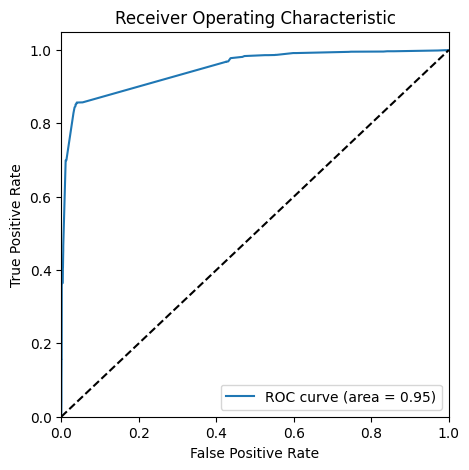

In [59]:
draw_roc_curve(train_predictions_df.Convert, train_predictions_df.Convert_Prob)

In [61]:
# Predicting Convert status with different probability cutoffs
cutoff_values = [float(x)/10 for x in range(10)]

for i in cutoff_values:
    train_predictions_df[i] = train_predictions_df.Convert_Prob.map(lambda x: 1 if x > i else 0)

# Calculating accuracy, sensitivity, and specificity for various probability cutoffs from 0.1 to 0.9.
df = pd.DataFrame(columns=['probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_score', 'precision_score'])

for i in cutoff_values:
    accuracy_score, sensitivity_score, specificity_score, precision_sc = evaluate_classification(train_predictions_df.Convert, train_predictions_df[i])
    df.loc[i] = [i, accuracy_score, sensitivity_score, specificity_score, precision_sc]

df

,probability_score,accuracy_score,sensitivity_score,specificity_score,precision_score
0.0,0.0,0.385136,1.000000,0.000000,0.385136
0.1,0.1,0.706503,0.981194,0.534443,0.568990
0.2,0.2,0.911195,0.857318,0.944942,0.907007
0.3,0.3,0.919383,0.856909,0.958515,0.928255
0.4,0.4,0.920170,0.856092,0.960307,0.931080
0.5,0.5,0.919540,0.854047,0.960563,0.931342
0.6,0.6,0.920170,0.851594,0.963124,0.935339
0.7,0.7,0.918753,0.843827,0.965685,0.939035
0.8,0.8,0.876397,0.700327,0.986684,0.970538
0.9,0.9,0.790742,0.464841,0.994878,0.982714


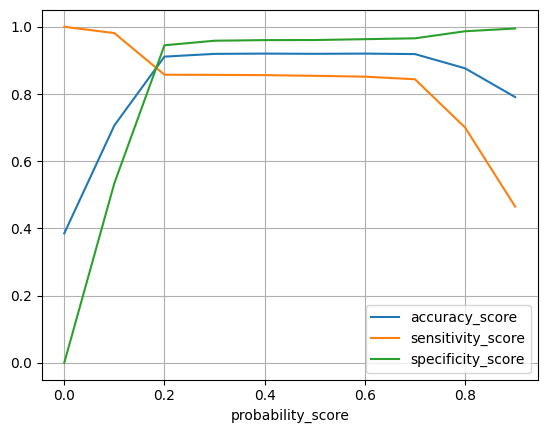

In [70]:
df.plot.line(x='probability_score', y=['accuracy_score', 'sensitivity_score', 'specificity_score'])
plt.grid(True)
plt.show()

* 0.19 probability

#Precision recall curve

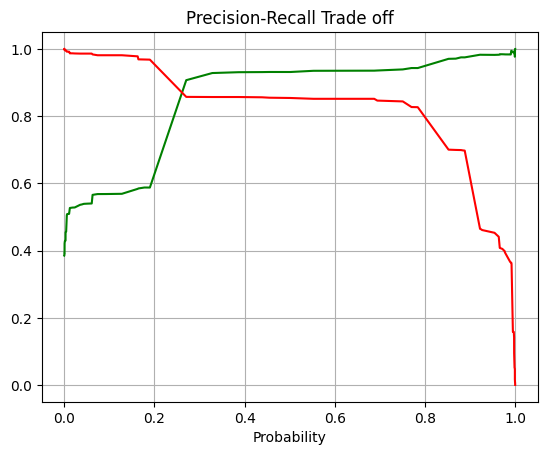

In [68]:
precision, recall, thresholds = precision_recall_curve(train_predictions_df.Convert, train_predictions_df.Convert_Prob)

plt.plot(thresholds, precision[:-1], "g-")
plt.plot(thresholds, recall[:-1], "r-")
plt.xlabel("Probability")
plt.title("Precision-Recall Trade off")
plt.grid(True)
plt.show()


* 0.25 probability

    * The optimal probability cutoff is determined by evaluating both the Sensitivity-Specificity-Accuracy plot and the Precision-Recall curve.
    In the Sensitivity-Specificity-Accuracy plot, the point at 0.19 probability appears to be optimal, while in the Precision-Recall curve,
    the optimal point is identified as 0.25.

   Ultimately, the decision is made to use 0.19 as the optimal cutoff probability.
    This chosen threshold is then applied to assign Lead Scores in the training data.

In [71]:
# Selecting the relevant columns from the DataFrame
train_predictions_df = train_predictions_df.iloc[:, :3]

# Creating a new column 'Convert_predicted' based on a cutoff probability of 0.19
train_predictions_df['Convert_predicted'] = train_predictions_df.Convert_Prob.map(lambda x: 1 if x > 0.19 else 0)

# Generating a 'Lead_Score' by rounding the 'Convert_Prob' multiplied by 100
train_predictions_df['Lead_Score'] = train_predictions_df.Convert_Prob.map(lambda x: round(x * 100))

# Displaying the first few rows of the DataFrame
train_predictions_df.head()

,Convert,Convert_Prob,Pros_ID,Convert_predicted,Lead_Score
0,0,0.189946,3009,0,19
1,0,0.061006,1012,0,6
2,0,0.000707,9226,0,0
3,1,0.784007,4750,1,78
4,1,0.977108,7987,1,98


In [72]:
# Evaluating model performance on training data
evaluate_classification(train_predictions_df.Convert, train_predictions_df.Convert_predicted, display_scores=True)

Confusion Matrix:
 [[3690  215]
 [ 349 2097]]
Accuracy: 0.911195087387813
Sensitivity: 0.857318070318888
Specificity: 0.9449423815620999
Precision: 0.9070069204152249


(0.911195087387813, 0.857318070318888, 0.9449423815620999, 0.9070069204152249)

###Test Set Prediction

In [73]:
# Getting the predicted values on the test set
X_test_sm = sm.add_constant(X_test[col_support])
y_test_pred = res.predict(X_test_sm)

# Creating DataFrames for actual and predicted values
y_test_actual_df = pd.DataFrame(y_test)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=["Converting_Probability"])
y_test_actual_df['Prospect ID'] = y_test_actual_df.index

# Concatenating actual and predicted values
y_predicted_final = pd.concat([y_test_actual_df.reset_index(drop=True), y_test_pred_df.reset_index(drop=True)], axis=1)

# Applying a cutoff probability of 0.19 to determine final predictions
y_predicted_final['final_predicted'] = y_predicted_final.Converting_Probability.map(lambda x: 1 if x > 0.19 else 0)

# Assigning Lead Scores based on the predicted probability
y_predicted_final['Lead_Score'] = y_predicted_final.Converting_Probability.map(lambda x: round(x * 100))

y_predicted_final.head()


,Converted,Prospect ID,Converting_Probability,final_predicted,Lead_Score
0,0,3271,0.189946,0,19
1,1,1490,0.888099,1,89
2,0,7936,0.189946,0,19
3,1,4216,0.999300,1,100
4,0,3830,0.189946,0,19


In [74]:
# Evaluating model performance on test data

evaluate_classification(y_predicted_final.Converted, y_predicted_final.final_predicted, display_scores=True)

Confusion Matrix:
 [[1640   94]
 [ 157  832]]
Accuracy: 0.9078222548659567
Sensitivity: 0.8412537917087968
Specificity: 0.9457900807381776
Precision: 0.8984881209503239


(0.9078222548659567,
 0.8412537917087968,
 0.9457900807381776,
 0.8984881209503239)

In [75]:
# Print features used in the final model
print("Features used in the Final Model:", col_support)

# Print Feature Importance
print("-----------------------Feature Importance--------------------")
print(res.params)


Features used in the Final Model: Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')
-----------------------Feature Importance--------------------
const                                      -1.919177
Do Not Email                               -1.283482
Lead Origin_Lead Add Form                   1.203526
Lead Source_Welingak Website                3.282453
Tags_Busy                                   3.804276
Tags_Closed by Horizzon                     7.978850
Tags_Lost to EINS                           9.194818
Tags_Ringing                               -1.812061
Tags_Will revert after reading the email    3.990641
Tags_switched off                          -2.445628
Lead Qual

In [82]:
# final reuseable code
def build_classification_model(X_train, y_train, X_test, y_test, cutoff=0.5):
    """
    Build a logistic regression model and return predicted values on the test dataset.

    Args:
    - X_train: Features of the training dataset.
    - y_train: Target variable of the training dataset.
    - X_test: Features of the test dataset.
    - y_test: Target variable of the test dataset.
    - cutoff (float): Probability cutoff for converting to binary predictions.

    Returns:
    - y_test_pred_final: DataFrame with Prospect ID, Actual Conversion, Predicted Probability, Binary Prediction, and Lead Score.
    """
    # Train model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = logm.fit()

    y_train_pred = res.predict(X_train_sm).values.reshape(-1)

    # Creating DataFrame for training data
    y_train_pred_final = pd.DataFrame({'Prospect ID': y_train.index, 'Converted': y_train.values, 'Convert_Probability': y_train_pred})
    y_train_pred_final['Convert_predicted'] = y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Probability.map(lambda x: round(x * 100))
    print("------------------Result of training data-------------------")
    print(y_train_pred_final.head())

    # Predicting Lead Score on Test data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)

    # Creating DataFrame for test data
    y_test_pred_final = pd.DataFrame({'Prospect ID': y_test.index, 'Converted': y_test.values, 'Convert_Probability': y_test_pred})
    y_test_pred_final['Convert_predicted'] = y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead_Score'] = y_test_pred_final.Convert_Probability.map(lambda x: round(x * 100))
    y_test_pred_final.reset_index(inplace=True, drop=True)
    print("------------------Result of test data-------------------")
    print(y_test_pred_final.head())

    print("------------------Model Evaluation Metrics-------------------")
    evaluate_classification(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, display_scores=True)

    return y_test_pred_final

In [83]:
build_classification_model(X_train[col_support], y_train, X_test[col_support], y_test, cutoff=0.19)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.189946                  0          19
1         1012          0             0.061006                  0           6
2         9226          0             0.000707                  0           0
3         4750          1             0.784007                  1          78
4         7987          1             0.977108                  1          98
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.189946                  0          19
1         1490          1             0.888099                  1          89
2         7936          0             0.189946                  0          19
3         4216          1             0.999300                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.189946,0,19
1,1490,1,0.888099,1,89
2,7936,0,0.189946,0,19
3,4216,1,0.999300,1,100
4,3830,0,0.189946,0,19
...,...,...,...,...,...
2718,850,0,0.189946,0,19
2719,2879,0,0.004316,0,0
2720,6501,1,0.991926,1,99
2721,7155,0,0.189946,0,19


#Conclusion:


The logistic regression model is utilized to estimate the likelihood of a customer converting. Instead of directly predicting whether a customer will convert or not, the model calculates the probability of conversion. To make practical predictions, a cutoff probability of 0.19 is chosen.

  * Here's how the predictions are interpreted:

     * **Hot Lead:** If the predicted probability of conversion is greater than 0.19, it suggests that the customer is
      likely to convert.
     * **Cold Lead:** If the predicted probability is 0.19 or less, it indicates that the customer is unlikely to convert.

* Our final Logistic Regression Model is constructed with 12 key features. The selected features that significantly impact the model's predictions include:
       'Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'
* The top three categorical/dummy variables in the final model, based on the absolute value of their coefficient factors, are 'Tags_Lost to EINS,' 'Tags_Closed by Horizzon,' and 'Lead Quality_Worst.'

* The influential features in the final Logistic Regression Model are derived from the encoding of the original categorical variables, such as 'Tags' and 'Lead Quality'. The top three features, along with their respective coefficient factors, are as follows:

      'Tags_Lost to EINS' (Coefficient factor = 9.194818)
      'Tags_Closed by Horizzon' (Coefficient factor = 7.978850)
      'Lead Quality_Worst' (Coefficient factor = -3.910568)

* Interpretation of Coefficients:

    * The positive coefficient of 'Tags_Lost to EINS' (9.194818) suggests a strong positive influence on the likelihood of conversion when this tag is present.
    * Similarly, 'Tags_Closed by Horizzon' (7.978850) has a positive impact on conversion.
    * Conversely, 'Lead Quality_Worst' (-3.910568) has a negative impact, indicating that leads with the worst lead quality are less likely to convert.
* Key Model Metrics:

    * The final model achieves a Sensitivity of 0.841, indicating its ability to correctly predict 84% of the converted customers out of all actual conversions.
    * The Precision of 0.89 implies that 89% of predicted hot leads are indeed true hot leads.



### Assignment Subjective questions:
  

3.	X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.

In [84]:
build_classification_model(X_train[col_support], y_train, X_test[col_support], y_test, cutoff=0.1)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.189946                  1          19
1         1012          0             0.061006                  0           6
2         9226          0             0.000707                  0           0
3         4750          1             0.784007                  1          78
4         7987          1             0.977108                  1          98
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.189946                  1          19
1         1490          1             0.888099                  1          89
2         7936          0             0.189946                  1          19
3         4216          1             0.999300                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.189946,1,19
1,1490,1,0.888099,1,89
2,7936,0,0.189946,1,19
3,4216,1,0.999300,1,100
4,3830,0,0.189946,1,19
...,...,...,...,...,...
2718,850,0,0.189946,1,19
2719,2879,0,0.004316,0,0
2720,6501,1,0.991926,1,99
2721,7155,0,0.189946,1,19


4.	Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

In [103]:
build_classification_model(X_train[col_support], y_train, X_test[col_support], y_test, cutoff=0.7)

------------------Result of training data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3009          0             0.189946                  0          19
1         1012          0             0.061006                  0           6
2         9226          0             0.000707                  0           0
3         4750          1             0.784007                  1          78
4         7987          1             0.977108                  1          98
------------------Result of test data-------------------
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead_Score
0         3271          0             0.189946                  0          19
1         1490          1             0.888099                  1          89
2         7936          0             0.189946                  0          19
3         4216          1             0.999300                  1         100
4         3830          

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead_Score
0,3271,0,0.189946,0,19
1,1490,1,0.888099,1,89
2,7936,0,0.189946,0,19
3,4216,1,0.999300,1,100
4,3830,0,0.189946,0,19
...,...,...,...,...,...
2718,850,0,0.189946,0,19
2719,2879,0,0.004316,0,0
2720,6501,1,0.991926,1,99
2721,7155,0,0.189946,0,19
